In [295]:
"""
Monte Carlo Simulation for insurance inputs
Use this section for inserting the inputs that will inform the model
"""

# Number of records by type for privacy liability
num_phi = 0
num_pii = 100
num_pci = 0

# Network interruption inputs
recovery_obj = 72
daily_income = 1000000
contractor_rate = 350

#Current estimated spending on controls
it_spend = 500000

# Insurance Inputs
# Provide either desired coverage or input information from actual quotes

limit_1 = 1000000
retention_1 = 25000
premium_1 = 15000

limit_2 = 2000000
retention_2 = 50000
premium_2 = 30000


In [289]:
"""
These are the fixed data points; these are assumptions based on research and should be updated as values change

"""
average_ransomware = 334000
avg_bec_loss = 94000

phi_cost = 250
pii_cost = 180
pci_cost = 250

hourly_income = daily_income/24

ci_95 = 0.95
ci_90 = 0.90

num_simulations = 50000



The average loss value is:  $336,228.55
The 90% loss value is:  $652,617.77
The 95% loss value is:  $796,438.85


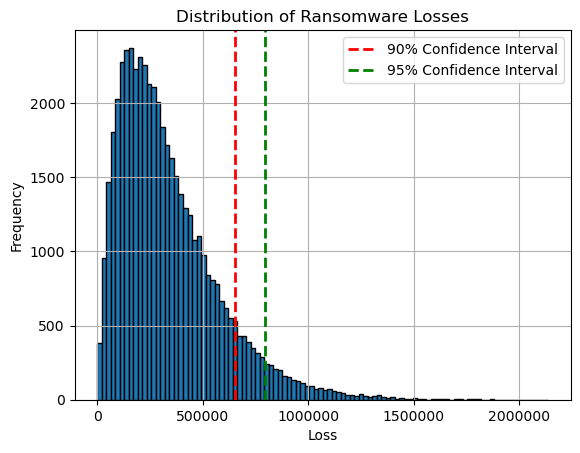

In [244]:
"""
Ransomware Distribution
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale

# Simulate random values with a slight right skew using a Gamma distribution
# (adjust alpha for more/less skew)
ransom_data = pd.Series(np.random.gamma(shape=2, scale=average_ransomware/2, size=num_simulations))

# Calculate the quantile value based on the confidence level
ransom_quantile_90 = ransom_data.quantile(ci_90)
ransom_quantile_95 = ransom_data.quantile(ci_95)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') #Covnert to formatted currency
print("The average loss value is: ", locale.currency(np.mean(ransom_data), grouping=True))
print("The 90% loss value is: ", locale.currency(ransom_quantile_90, grouping=True))
print("The 95% loss value is: ", locale.currency(ransom_quantile_95, grouping=True))

# Plot the Distribution of Values
plt.hist(ransom_data, bins=100,  edgecolor='black')  # Adjust bins for better visualization
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.title("Distribution of Ransomware Losses")
plt.ticklabel_format(axis='x', style='plain')

# Plot the Confidence Interval Line (90% and 95% of values under this value)
plt.axvline(x=ransom_quantile_90, color='r', linestyle='dashed', linewidth=2, label=f"{ci_90:.0%} Confidence Interval")
plt.axvline(x=ransom_quantile_95, color='g', linestyle='dashed', linewidth=2, label=f"{ci_95:.0%} Confidence Interval")
plt.legend()

plt.grid(True)
plt.show()


The Average loss value is:  $94,158.89
The 90% loss value is:  $157,886.81
The 95% loss value is:  $176,062.55


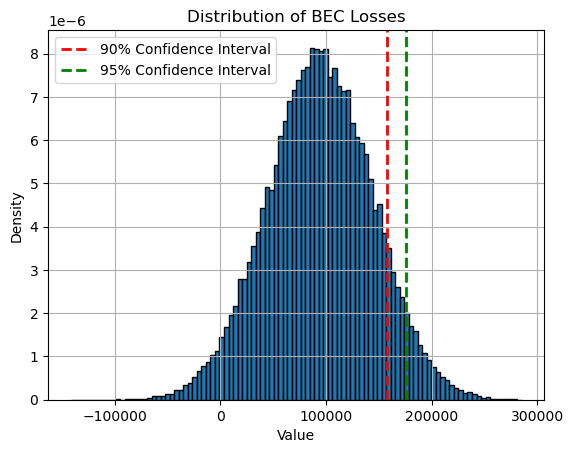

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


# Simulate random values with a slight right skew using a Gamma distribution
# (adjust alpha for more/less skew)
bec_data = pd.Series(np.random.normal(avg_bec_loss, 50000, num_simulations))

# Calculate the quantile value based on the confidence level
bec_quantile_90 = bec_data.quantile(ci_90)
bec_quantile_95 = bec_data.quantile(ci_95)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
print("The Average loss value is: ", locale.currency(np.mean(bec_data), grouping=True))
print("The 90% loss value is: ", locale.currency(bec_quantile_90, grouping=True))
print("The 95% loss value is: ", locale.currency(bec_quantile_95, grouping=True))

# Plot the Distribution of Values
plt.hist(bec_data, bins=100, density=True, edgecolor='black')  # Adjust bins for better visualization
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Distribution of BEC Losses")

# Plot the Confidence Interval Line (90% of values under this value)
plt.axvline(x=bec_quantile_90, color='r', linestyle='dashed', linewidth=2, label=f"{ci_90:.0%} Confidence Interval")
plt.axvline(x=bec_quantile_95, color='g', linestyle='dashed', linewidth=2, label=f"{ci_95:.0%} Confidence Interval")
plt.legend()

plt.grid(True)
plt.show()


The Average loss value is:  $2,474,373.93
The 90% loss value is:  $4,453,155.19
The 95% loss value is:  $4,727,160.10


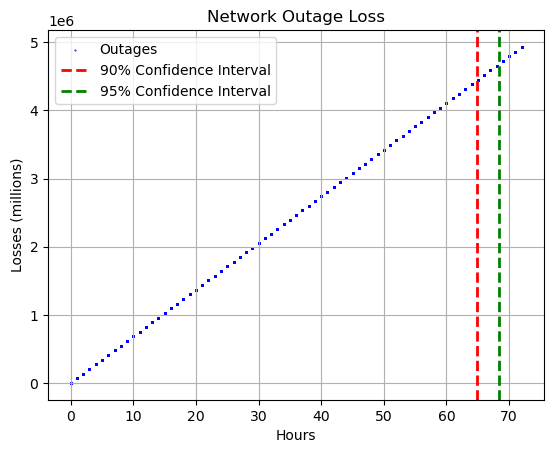

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define variables
slope = hourly_income
intercept = contractor_rate

# Generate random data
seed = random.uniform(0.25,2)
hours = np.random.randint(0, recovery_obj+1, size=num_simulations)
losses = (slope * hours + intercept)*seed

# Create pandas DataSeries
outage_data = pd.Series(losses, index=hours, name='y_value')

# Plot the data series
plt.scatter(outage_data.index, outage_data.values, marker='o', s=0.2, color='b', label='Outages')

# Calculate the quantile value based on the confidence level
outage_quantile_90 = outage_data.quantile(ci_90)
outage_quantile_95 = outage_data.quantile(ci_95)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
print("The Average loss value is: ", locale.currency(np.mean(outage_data), grouping=True))
print("The 90% loss value is: ", locale.currency(outage_quantile_90, grouping=True))
print("The 95% loss value is: ", locale.currency(outage_quantile_95, grouping=True))

# Label axes and add title
plt.xlabel('Hours')
plt.ylabel('Losses (millions)')
plt.title('Network Outage Loss')

plt.axvline(x=(ci_90*recovery_obj), color='r', linestyle='dashed', linewidth=2, label=f"{ci_90:.0%} Confidence Interval")
plt.axvline(x=(ci_95*recovery_obj), color='g', linestyle='dashed', linewidth=2, label=f"{ci_95:.0%} Confidence Interval")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

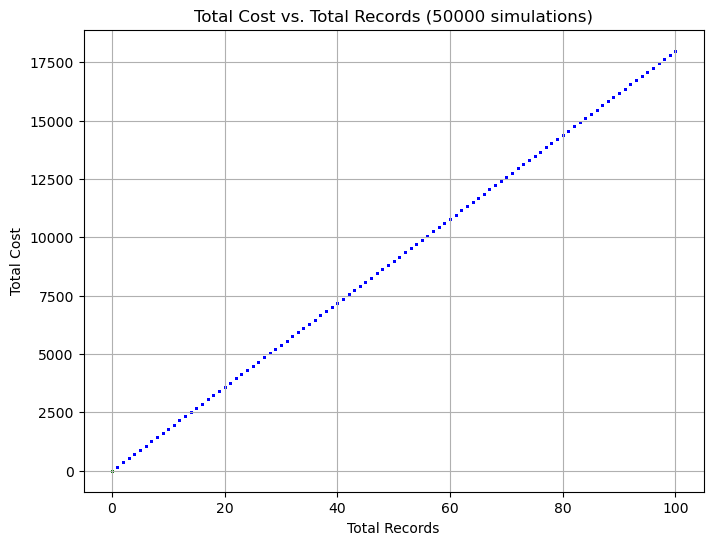

In [304]:
"""
This section is used to estimate the extent of breaches based on record counts
"""

import random

total_num_pii = np.random.randint(num_pii+1, size=num_simulations)
total_num_phi = np.random.randint(num_phi+1, size=num_simulations)
total_num_pci = np.random.randint(num_pci+1, size=num_simulations)

total_num_priv = total_num_pii+total_num_pci+total_num_phi

total_cost_pii = total_num_pii * pii_cost
total_cost_phi = total_num_phi * phi_cost
total_cost_pci = total_num_pci * pci_cost

total_cost_priv = total_cost_pii+total_cost_pci+total_cost_phi


"""
print(np.mean(total_num_pii))
print(np.mean(total_num_phi))
print(np.mean(total_num_pci))
print(np.mean(total_cost_pii))
print(np.mean(total_cost_phi))
print(np.mean(total_cost_pci))
"""

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_num_pii, total_cost_pii, marker='o', s=0.2, color='b')
plt.scatter(total_num_phi, total_cost_phi, marker='o', s=0.2, color='r')
plt.scatter(total_num_pci, total_cost_pci, marker='o', s=0.2, color='g')

# Labels and title
plt.xlabel('Total Records')
plt.ylabel('Total Cost')
plt.title(f'Total Cost vs. Total Records ({num_simulations} simulations)')

# Grid lines
plt.grid(True)

# Show plot
plt.show()

In [302]:
"""
This section is used to calculate some of the metrics for the TCOR calculations
Change probabilities based on msot recent data
"""

ransom_prob = 0.1
outage_prob = 0.001
bec_prob = 0.1
priv_prob = 0.1

annual_loss = 5000000 #(np.mean(ransom_data)*ransom_prob)+(np.mean(outage_data)*outage_prob)+(np.mean(bec_data)*bec_prob)+(np.mean(total_cost_priv)*priv_prob)

print(annual_loss)

5000000


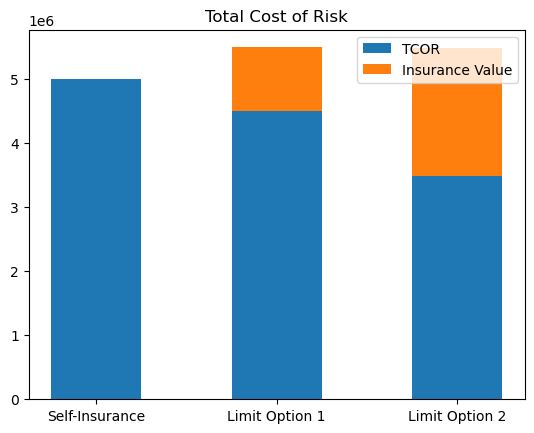

In [299]:
import matplotlib.pyplot as plt
import numpy as np

species = (
    "Self-Insurance",
    "Limit Option 1",
    "Limit Option 2",
)

weight_counts = {
    "TCOR": np.array([annual_loss, (min(retention_1, annual_loss)+premium_1+it_spend+max(annual_loss-premium_1-retention_1-limit_1,0)), (min(retention_2, annual_loss)+premium_1+it_spend+max(annual_loss-premium_2-retention_2-limit_2,0))]),
    "Insurance Value": np.array([0, min(max(annual_loss-premium_1-retention_1-it_spend-limit_1,0),limit_1), min(max(annual_loss-premium_2-retention_2-it_spend-limit_2,0),limit_2)])
}
    
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Total Cost of Risk")
ax.legend(loc="upper right")

plt.show()